In [39]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
import random as rm



In [40]:
#coorndenadas de circulo
x1=np.asarray(np.random.uniform(-1.5,1.5,3000))
x2=np.asarray(np.random.uniform(-1.5,1.5,3000))

X = []
Y = []

x1_t=np.asarray(np.random.uniform(-1.5,1.5,1000))
x2_t=np.asarray(np.random.uniform(-1.5,1.5,1000))

X_t = []
Y_t = []


for i in range(0,1000):
    if(x2_t[i]**2+x1_t[i]**2 <= 1):
        Y_t.append( [1])
    else:
        Y_t.append( [0])
    X_t.append([x1_t[i],x2_t[i]])


for j in range(0,3000):
    if(x2[j]**2+x1[j]**2 <= 1):
        Y.append( [1])
    else:
        Y.append( [0])
    X.append([x1[j],x2[j]])

#Cambio de formato a array
X=np.asarray(X)
Y=np.asarray(Y)

X_t=np.asarray(X_t)
Y_t=np.asarray(Y_t)

Declaracion de Variables

In [41]:
input_size = 2
output_layer_size = 1
middle_size = 6

#input and output
x = tf.placeholder(tf.float32,[None, input_size])

#y es la prediccion de y_
#y_ son los datos de y
y_ = tf.placeholder(tf.float32,[None, output_layer_size])

##cambios
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1") 


W_layer2 = tf.Variable(tf.random_uniform([middle_size,middle_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([middle_size]), name="b_layer2")

W_layer3 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer3")
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer3")

In [42]:
hidden1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra

hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W_layer2)+b_layer2) #la de nuestra

y = tf.nn.sigmoid(tf.matmul(hidden2,W_layer3)+b_layer3) #la de nuestra

lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico

#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)


In [43]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [44]:
sess.run(init) 

Ws = []

for i in range (1000):
    sess.run(train_step, feed_dict = {x: X, y_: Y})
    #w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
    #w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
    #w3=[sess.run(b_layer3, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer3, feed_dict={x: X, y_: Y})]
    #Ws.append([w1,w2,w3])
    



In [45]:
#print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
#print(sess.run(W_layer2, feed_dict={x: X, y_: Y}))

In [46]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.972667


In [47]:
w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
w3=[sess.run(b_layer3, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer3, feed_dict={x: X, y_: Y})]

In [48]:
print w1
print w2
print w3



[9.5702209, -10.766897, -4.5128055]
[3.2702847, -7.0984244, 9.403388, -3.579937, -1.4088824, 6.3355765, 0.22728948]
[4.2216549, -5.9806485, -5.0539513, -7.308033, -4.6076837, -1.3549279, -7.8772402]


# SVM 

Accuracy Neural Nets: 
0.972667
Accuracy RBF kernel: 
0.992


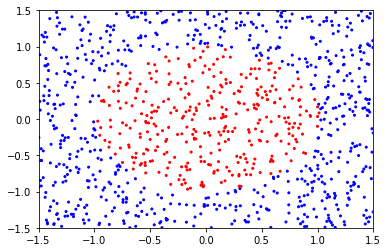

In [49]:
print("Accuracy Neural Nets: ")
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

print("Accuracy RBF kernel: ")
sv3=svm.SVC(kernel='rbf')
sv3.fit(X, Y)
Y_svm3 = sv3.predict(X_t)
print(sv3.score(X_t,Y_t)) 

plt.scatter(X_t[:,0],X_t[:,1],c=['red' if i==1 else 'blue' for i in Y_svm3], s=4)
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.show()
plt.clf()





Accuracy for Knn: 
0.987


/Users/normalazo/Desktop/env1/pythonEnv1/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


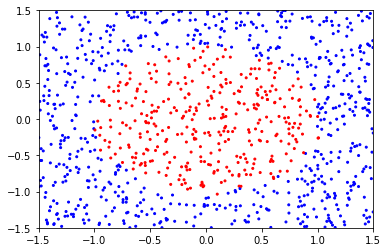

In [50]:
import sklearn.neighbors as knn

print("Accuracy for Knn: ")
knnM=knn.KNeighborsClassifier(n_neighbors=5)
knnM.fit(X, Y)
Y_knn = knnM.predict(X_t)
print(knnM.score(X_t,Y_t))

plt.scatter(X_t[:,0],X_t[:,1],c=['red' if i==1 else 'blue' for i in Y_knn], s=4)
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.show()
plt.clf()


In [51]:
sess.close()

# Conclusion
The ranking for the accuracy is as follows:
1. SVM
2. KNN
3. Neural Nets
